In [1]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
from PIL import Image
import pickle
import nltk
import konlpy

In [75]:
with open('save_4.pkl', 'rb') as f:
    keyword = pickle.load(f)
    
with open('text_num.pkl', 'rb') as f:
    number_of_texts = pickle.load(f)

In [123]:
for keys in number_of_texts.keys():
    print(f"{keys}: {number_of_texts[keys]}")

etc: 0
1970: 0
1980: 0
1990: 18
2000: 141
2010: 129
2020: 15


In [105]:
for keys in keyword.keys():
    print(f"{keys}: {len(keyword[keys])}")

etc: 0
1970: 0
1980: 0
1990: 130
2000: 2309
2010: 1735
2020: 166


In [76]:
text = {
    "etc": "",
    "1970": "",
    "1980": "",
    "1990": "",
    "2000": "",
    "2010": "",
    "2020": ""
}

In [77]:
kor = {
    "etc": [],
    "1970": [],
    "1980": [],
    "1990": [],
    "2000": [],
    "2010": [],
    "2020": []
}

eng = {
    "etc": [],
    "1970": [],
    "1980": [],
    "1990": [],
    "2000": [],
    "2010": [],
    "2020": []
}

# kor 은 영어 주제어, eng은 영어 주제어

In [78]:
for keys in keyword.keys():
    for s in keyword[keys]:
        for c in s:
            if ord('가') <= ord(c) <= ord('힣'):
                kor[keys].append(s)
                break
            elif ord('a') <= ord(c.lower()) <= ord('z'):
                eng[keys].append(s)
                break
      

In [79]:
# 연대별 데이터를 하나로 합치는 함수 
# no 파라미터에 전달되는 것은 합치지 않음 
def combining(keyword, no = []):
    whole = []
    for keys in keyword.keys():
        if keys in no:
            continue
        whole.append(keyword[keys])

    mydata = np.concatenate(whole).tolist()
    return mydata

In [80]:
def setencize(para):
    string = ' '.join(para)
    return string

In [81]:
# 각 연댑별 주제어들을 하나의 string으로 합친 뒤에 
# komoran POS Tagging으로 다시 나누기

sent = {}
for keys in kor.keys():
    sent[keys] = setencize(kor[keys])

kmr = konlpy.tag.Komoran()
kmr_morphs = {}
for keys in kor.keys():
    kmr_morphs[keys] = kmr.pos(sent[keys])

In [83]:
kmr_morphs

{'etc': [],
 '1970': [],
 '1980': [],
 '1990': [('사회학', 'NNP'),
  ('사회학', 'NNP'),
  ('개발', 'NNG'),
  ('국가', 'NNG'),
  ('국가', 'NNG'),
  ('-', 'SS'),
  ('기업가', 'NNP'),
  ('ㄴ', 'JX'),
  ('관계', 'NNG'),
  ('금융', 'NNG'),
  ('정책', 'NNG'),
  ('제도', 'NNG'),
  ('화', 'XSN'),
  ('수확', 'NNP'),
  ('체증', 'NNG'),
  ('경로', 'NNP'),
  ('의존', 'NNG'),
  ('문화', 'NNG'),
  ('산업', 'NNG'),
  ('대중음악', 'NNP'),
  ('팬클럽', 'NNP'),
  ('입시', 'NNG'),
  ('위주', 'NNG'),
  ('학교', 'NNG'),
  ('체제', 'NNG'),
  ('청소년', 'NNG'),
  ('하위문화', 'NNP'),
  ('자기', 'NNP'),
  ('정체성', 'NNP'),
  ('자발', 'NNG'),
  ('적', 'XSN'),
  ('의지', 'NNG'),
  ('저항', 'NNG'),
  ('적', 'XSN'),
  ('잠재력', 'NNG'),
  ('일상생활', 'NNP'),
  ('근대성', 'NNP'),
  ('식민지', 'NNP'),
  ('이중', 'NNP'),
  ('경험', 'NNG'),
  ('주변', 'NNG'),
  ('이', 'VCP'),
  ('ㄴ', 'ETM'),
  ('부정', 'NNG'),
  ('의식', 'NNG'),
  ('경성', 'NNP'),
  ('가로', 'NNP'),
  ('구조', 'NNP'),
  ('도시', 'NNG'),
  ('교통', 'NNP'),
  ('건물', 'NNG'),
  ('도시', 'NNG'),
  ('경험', 'NNP'),
  ('새마을', 'NNP'),
  ('운동', 'NNP'),
  ('국가', 'NN

In [96]:
# 불용어 제거 
# "사회" 단어 제거 
# 연대별로 나누어져 있는 dictonary를 파라미터로 넣음 
def ssremove(kor):
    stopwords = ["사회학", "사회", "사회적", "주의"]
    kor_whole = combining(kor)
    unique_Noun_words = set(kor_whole)
    for keys in kor.keys():
        for word in unique_Noun_words:
            if word in stopwords:
                while word in kor[keys]: kor[keys].remove(word)
    return kor

In [112]:
# komoran 품사 사전 이용해서 명사, 동사, 형용사, 부사 정도만 골라냄 
Featured_POS = ['NNG', 'NNP', 'NP', 'NR', "VV", "VA", "MM", "MAG",]
selected_words = {
    "etc": [],
    "1970": [],
    "1980": [],
    "1990": [],
    "2000": [],
    "2010": [],
    "2020": []
}

for keys in kor.keys():
    for word, pos in kmr_morphs[keys]:
        if pos in Featured_POS:
            selected_words[keys].append(word)

# print(selected_words)

In [120]:
kmr_morphs

{'etc': [],
 '1970': [],
 '1980': [],
 '1990': [('사회학', 'NNP'),
  ('사회학', 'NNP'),
  ('개발', 'NNG'),
  ('국가', 'NNG'),
  ('국가', 'NNG'),
  ('-', 'SS'),
  ('기업가', 'NNP'),
  ('ㄴ', 'JX'),
  ('관계', 'NNG'),
  ('금융', 'NNG'),
  ('정책', 'NNG'),
  ('제도', 'NNG'),
  ('화', 'XSN'),
  ('수확', 'NNP'),
  ('체증', 'NNG'),
  ('경로', 'NNP'),
  ('의존', 'NNG'),
  ('문화', 'NNG'),
  ('산업', 'NNG'),
  ('대중음악', 'NNP'),
  ('팬클럽', 'NNP'),
  ('입시', 'NNG'),
  ('위주', 'NNG'),
  ('학교', 'NNG'),
  ('체제', 'NNG'),
  ('청소년', 'NNG'),
  ('하위문화', 'NNP'),
  ('자기', 'NNP'),
  ('정체성', 'NNP'),
  ('자발', 'NNG'),
  ('적', 'XSN'),
  ('의지', 'NNG'),
  ('저항', 'NNG'),
  ('적', 'XSN'),
  ('잠재력', 'NNG'),
  ('일상생활', 'NNP'),
  ('근대성', 'NNP'),
  ('식민지', 'NNP'),
  ('이중', 'NNP'),
  ('경험', 'NNG'),
  ('주변', 'NNG'),
  ('이', 'VCP'),
  ('ㄴ', 'ETM'),
  ('부정', 'NNG'),
  ('의식', 'NNG'),
  ('경성', 'NNP'),
  ('가로', 'NNP'),
  ('구조', 'NNP'),
  ('도시', 'NNG'),
  ('교통', 'NNP'),
  ('건물', 'NNG'),
  ('도시', 'NNG'),
  ('경험', 'NNP'),
  ('새마을', 'NNP'),
  ('운동', 'NNP'),
  ('국가', 'NN

In [ ]:
# 전체 단어에 대해서 빈도 확인 
from collections import Counter
c = Counter(combining(selected_words)) # input type should be a list of words (or tokens)
print(c)

In [116]:
# 불용어 제거한 기별 단어들 
selected_words = ssremove(selected_words)
selected_words

slct_old = combining(selected_words, ["2010", "2020"])

In [114]:
slct_new = combining(selected_words, ["etc", "1970", "1980", "1990", "2000"])

In [117]:
len(slct_new) + len(slct_old) == len(combining(selected_words))

True

In [ ]:
FONT_PATH = r'C:\Users\Autumn\AppData\Local\Microsoft\Windows\Fonts\GmarketSansTTFMedium.ttf' # For Korean characters
# yonsei = np.array(Image.open(r'basic.jpg'))
# colors = ImageColorGenerator(yonsei)

x, y = np.ogrid[:1000, :1000]

mask = (x - 500) ** 2 + (y - 500) ** 2 > 480 ** 2
mask = 255 * mask.astype(int)
def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({:d},{:d}%, {:d}%)".format(np.random.randint(200,219),np.random.randint(65,94),np.random.randint(31,40)))

wc = WordCloud(mask = mask, color_func=color_func, background_color="white", max_words=1000, max_font_size=1000, random_state=42, width=5000,height=5000, font_path=FONT_PATH)
#contour_color="#00498c", contour_width=1, color_func=colors)

# #f9d40a
#rgb(249, 212, 10)
#hsl(51, 95%, 51%)

# 검은색  #231815
#rgb(35, 24, 21)
#hsl(13, 25%, 11%)

# ㄹ얄 블루 
# hsl 219, 94, 34




In [122]:
kmr_morphs

{'etc': [],
 '1970': [],
 '1980': [],
 '1990': [('사회학', 'NNP'),
  ('사회학', 'NNP'),
  ('개발', 'NNG'),
  ('국가', 'NNG'),
  ('국가', 'NNG'),
  ('-', 'SS'),
  ('기업가', 'NNP'),
  ('ㄴ', 'JX'),
  ('관계', 'NNG'),
  ('금융', 'NNG'),
  ('정책', 'NNG'),
  ('제도', 'NNG'),
  ('화', 'XSN'),
  ('수확', 'NNP'),
  ('체증', 'NNG'),
  ('경로', 'NNP'),
  ('의존', 'NNG'),
  ('문화', 'NNG'),
  ('산업', 'NNG'),
  ('대중음악', 'NNP'),
  ('팬클럽', 'NNP'),
  ('입시', 'NNG'),
  ('위주', 'NNG'),
  ('학교', 'NNG'),
  ('체제', 'NNG'),
  ('청소년', 'NNG'),
  ('하위문화', 'NNP'),
  ('자기', 'NNP'),
  ('정체성', 'NNP'),
  ('자발', 'NNG'),
  ('적', 'XSN'),
  ('의지', 'NNG'),
  ('저항', 'NNG'),
  ('적', 'XSN'),
  ('잠재력', 'NNG'),
  ('일상생활', 'NNP'),
  ('근대성', 'NNP'),
  ('식민지', 'NNP'),
  ('이중', 'NNP'),
  ('경험', 'NNG'),
  ('주변', 'NNG'),
  ('이', 'VCP'),
  ('ㄴ', 'ETM'),
  ('부정', 'NNG'),
  ('의식', 'NNG'),
  ('경성', 'NNP'),
  ('가로', 'NNP'),
  ('구조', 'NNP'),
  ('도시', 'NNG'),
  ('교통', 'NNP'),
  ('건물', 'NNG'),
  ('도시', 'NNG'),
  ('경험', 'NNP'),
  ('새마을', 'NNP'),
  ('운동', 'NNP'),
  ('국가', 'NN

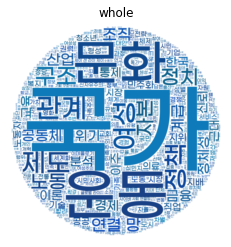

In [118]:
# 2020, 2010년대는 제외  
# 2439개 논문 
noun_text = ' '.join(slct_old)


wc.generate(noun_text)
plt.title("whole")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file('before_2010.png')


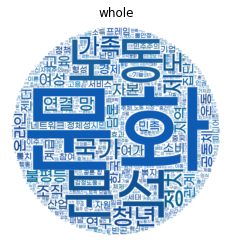

In [119]:
# 2020, 2010년대만
# 1901개 논문
noun_text = ' '.join(slct_new)


wc.generate(noun_text)
plt.title("whole")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file('from_2010.png')


#### 필요 없는 단어 제거 

In [14]:
temp = []
for keys in keyword.keys():
    if keys == "2020" or keys == "2010":
        continue
    temp.append(keyword[keys])

adjusted = np.concatenate(temp).tolist()


In [7]:
len(adjusted) == len(mydata) - len(keyword["2020"])

True

In [ ]:
length = 0
for keys in keyword.keys():
    # print(len(keyword[keys]))
    length = length + len(keyword[keys])


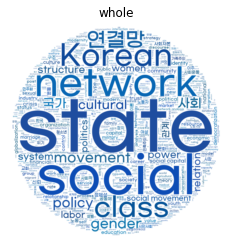

In [15]:
# 2020, 2010년대는 제외  

noun_text = ' '.join(adjusted)


wc.generate(noun_text)
plt.title("whole")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file('c_adjusted.png')


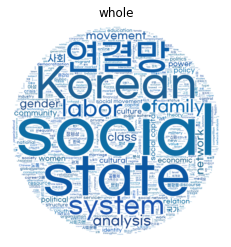

In [36]:
# 2020년대까지 포함 

noun_text = ' '.join(mydata)


wc.generate(noun_text)
plt.title("whole")
plt.imshow(wc.recolor(color_func = color_func), interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file('c_whole.png')


In [ ]:
len(adjusted) == len(mydata) - len(keyword["2020"])

True

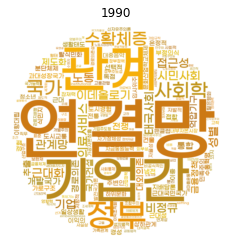

In [91]:
noun_text = ' '.join(keyword["1990"])


wc.generate(noun_text)
plt.title("1990")
plt.imshow(wc.recolor(color_func = color_func), interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file('c_1990.png')


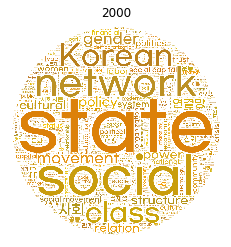

In [92]:
noun_text = ' '.join(keyword["2000"])


wc.generate(noun_text)
plt.title("2000")
plt.imshow(wc.recolor(color_func = color_func), interpolation="nearest")
plt.axis("off")
plt.show()
wc.to_file('c_2000.png')


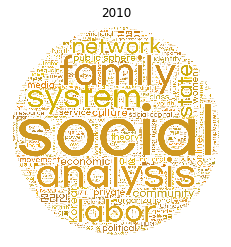

In [93]:
noun_text = ' '.join(keyword["2010"])


wc.generate(noun_text)
plt.title("2010")
plt.imshow(wc.recolor(color_func = color_func), interpolation="nearest")
plt.axis("off")
plt.show()
wc.to_file('c_2010.png')


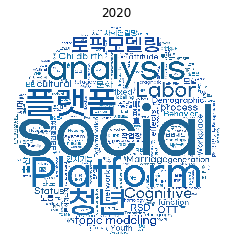

In [28]:
noun_text = ' '.join(keyword["2020"])


wc.generate(noun_text)
plt.title("2020")
plt.imshow(wc.recolor(color_func = color_func), interpolation="nearest")
plt.axis("off")
plt.show()
wc.to_file('c_2020.png')
